# Data owner: upload dataset

## Install

In [1]:
#!pip install syft

In [2]:
from syft import Worker
import syft as sy
from syft.core.node.new.util import autocache, PANDAS_DATA
worker = Worker.named("test-domain-1", processes=1, reset=True)
root_domain_client = worker.root_client

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/PySyft


SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.Data

## Load data

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [4]:
from datetime import timedelta
import random
from dateutil.parser import parse
from pandas._libs.tslibs.timestamps import Timestamp

<AxesSubplot: xlabel='Date/Time'>

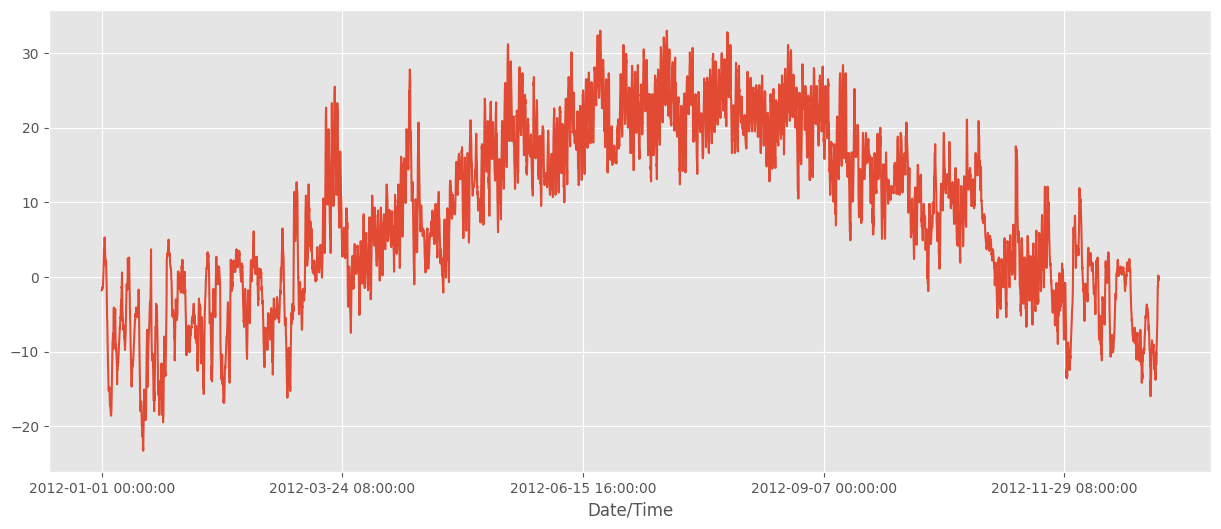

In [5]:
weather_2012_final = pd.read_csv(autocache(f"{PANDAS_DATA}/weather_2012.csv"), index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## Create mock data

Instead, we upload our dataset per month as a starting point

In [6]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit"

In [7]:
weather_types = set(weather_2012_final.Weather.to_list())

In [8]:
def get_mock_date(i):
    return str(parse('Jun 1 2010') + timedelta(days=i))

def get_mock_row(i):
    res = dict()
    for k, function in mock_functions.items():
        res[k] = function()
    return res
    

In [9]:
mock_functions = {
    "Temp (°C)": lambda: random.uniform(-10, 40),
    "Dew Point Temp (C)": lambda: random.uniform(-10, 10),
    "Rel Hum (%)": lambda: random.randint(50, 100),
    "Wind Spd (km/h)": lambda: random.randint(1, 30),
    'Visibility (km)': lambda: random.uniform(0.5, 40),
    'Stn Press (kPa)': lambda: random.uniform(50, 100),
    'Weather': lambda: random.choice(list(weather_types))
}

In [10]:
assets = []
for month in range(1, 13):
    url = url_template.format(month=month, year=2012)
    weather = pd.read_csv(url, parse_dates=True, index_col='Date/Time (LST)')
    mock = pd.DataFrame(index=[Timestamp(get_mock_date(i)) for i in range(len(weather))],
                    data=[get_mock_row(i) for i in range(len(weather))],
                    columns=weather.columns)
    
    assets += [sy.Asset(name=f"weather{month}", data=weather, mock=mock, mock_is_real=False)]

Upload the data

In [11]:
dataset = sy.Dataset(name="test", asset_list=assets)
root_domain_client.upload_dataset(dataset)


  0%|                                                                                                                | 0/12 [00:00<?, ?it/s]

Uploading: weather1


  8%|████████▋                                                                                               | 1/12 [00:00<00:02,  4.86it/s]

Uploading: weather2


 17%|█████████████████▎                                                                                      | 2/12 [00:00<00:01,  5.29it/s]

Uploading: weather3


 25%|██████████████████████████                                                                              | 3/12 [00:00<00:01,  5.46it/s]

Uploading: weather4


 33%|██████████████████████████████████▋                                                                     | 4/12 [00:00<00:01,  5.56it/s]

Uploading: weather5


 42%|███████████████████████████████████████████▎                                                            | 5/12 [00:00<00:01,  5.61it/s]

Uploading: weather6


 50%|████████████████████████████████████████████████████                                                    | 6/12 [00:01<00:01,  5.64it/s]

Uploading: weather7


 58%|████████████████████████████████████████████████████████████▋                                           | 7/12 [00:01<00:00,  5.61it/s]

Uploading: weather8


 67%|█████████████████████████████████████████████████████████████████████▎                                  | 8/12 [00:01<00:00,  5.59it/s]

Uploading: weather9


 75%|██████████████████████████████████████████████████████████████████████████████                          | 9/12 [00:01<00:00,  5.52it/s]

Uploading: weather10


 83%|█████████████████████████████████████████████████████████████████████████████████████▊                 | 10/12 [00:01<00:00,  5.57it/s]

Uploading: weather11


 92%|██████████████████████████████████████████████████████████████████████████████████████████████▍        | 11/12 [00:01<00:00,  5.57it/s]

Uploading: weather12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.53it/s]


<class 'syft.core.node.new.response.SyftSuccess'>: Dataset Added

In [12]:
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,00:00,-10.8,NaN,...,NaN,25.0,NaN,103.26,NaN,NaN,NaN,-16.0,NaN,Clear
2012-12-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,01:00,-11.0,NaN,...,NaN,25.0,NaN,103.25,NaN,NaN,NaN,-17.0,NaN,Mainly Clear
2012-12-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,02:00,-11.1,NaN,...,NaN,25.0,NaN,103.21,NaN,NaN,NaN,-19.0,NaN,Mainly Clear
2012-12-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,03:00,-12.5,NaN,...,NaN,25.0,NaN,103.27,NaN,NaN,NaN,-20.0,NaN,Mainly Clear
2012-12-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,04:00,-11.8,NaN,...,NaN,25.0,NaN,103.22,NaN,NaN,NaN,-19.0,NaN,Mostly Cloudy


## Create user account

In [13]:
user = root_domain_client.register(name="Jane Doe", email="jane@caltech.edu",
                            password="abc123", institution="Caltech", website="https://www.caltech.edu/")

In [14]:
# todo: give user data scientist role

In [15]:
guest_domain_client = worker.guest_client

In [16]:
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

# Data scientist: create syft_function

In [18]:
import numpy as np
import pandas as pd

## Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

## Get mocks

In [19]:
guest_domain_client = worker.guest_client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [21]:
ds = guest_domain_client.datasets[0]

In [22]:
ds.assets

,key,type,id
0,weather1,syft.core.node.new.dataset.Asset,896ed23090aa4c85b96553daee938200
1,weather2,syft.core.node.new.dataset.Asset,75062890d4e24b49b4a8b7f4bacefb05
2,weather3,syft.core.node.new.dataset.Asset,b58877908e914aaab6ae5161dbe49767
3,weather4,syft.core.node.new.dataset.Asset,a6a6ac935fbe4684a56d15510054b98c
4,weather5,syft.core.node.new.dataset.Asset,132b15dcf3b5408e9cb95e649e88b454


## Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for Canadian historical weather data, and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

In [23]:
url_template = "weather{month}"

To get the data for March 2013, we need to format it with `month=3`, `year=2012.`


In [24]:
url = url_template.format(month=3, year=2012)

In [25]:
asset = ds.assets[url]
weather_mar2012 = asset.mock

This is super great! We can just use the this mock directly, and just give it a URL as a filename. Awesome.
Here's the resulting dataframe.

In [26]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833748,NaN,...,NaN,32.230790,NaN,74.140072,NaN,NaN,NaN,NaN,NaN,"Rain,Haze"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.644286,NaN,...,NaN,20.026604,NaN,73.804878,NaN,NaN,NaN,NaN,NaN,Fog
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.750146,NaN,...,NaN,1.618209,NaN,86.395793,NaN,NaN,NaN,NaN,NaN,"Freezing Rain,Snow Grains"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.029955,NaN,...,NaN,22.503375,NaN,81.336638,NaN,NaN,NaN,NaN,NaN,"Freezing Rain,Ice Pellets,Fog"
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.016756,NaN,...,NaN,28.177143,NaN,66.781409,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.129518,NaN,...,NaN,4.473360,NaN,64.455504,NaN,NaN,NaN,NaN,NaN,Freezing Fog
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.517445,NaN,...,NaN,9.729537,NaN,93.574590,NaN,NaN,NaN,NaN,NaN,"Freezing Rain,Snow Grains"
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.160893,NaN,...,NaN,36.450106,NaN,87.955853,NaN,NaN,NaN,NaN,NaN,Haze
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.096490,NaN,...,NaN,18.457757,NaN,89.361539,NaN,NaN,NaN,NaN,NaN,"Rain,Ice Pellets"


<AxesSubplot: >

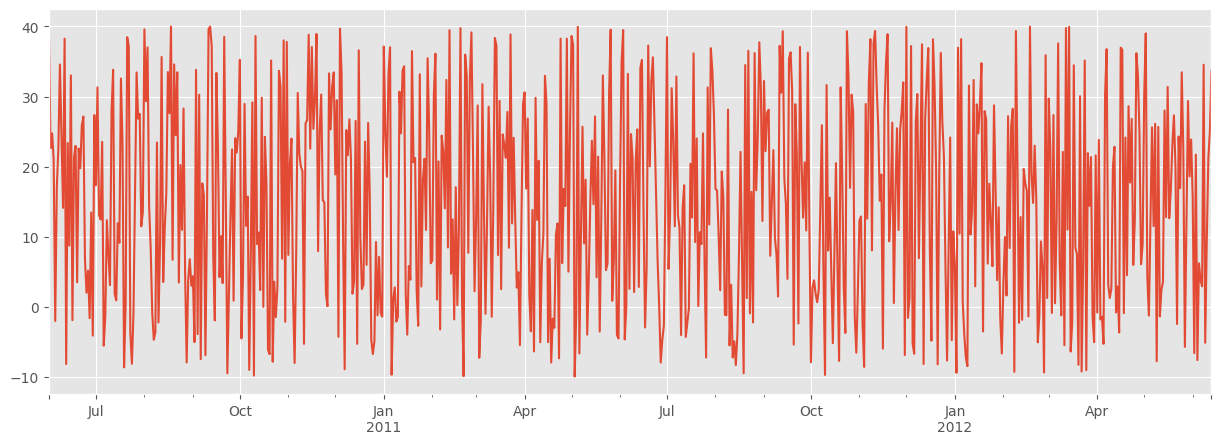

In [27]:
weather_mar2012[u"Temp (°C)"].plot(figsize=(15, 5))

In [28]:
asset.mock

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
2010-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.833748,NaN,...,NaN,32.230790,NaN,74.140072,NaN,NaN,NaN,NaN,NaN,"Rain,Haze"
2010-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.644286,NaN,...,NaN,20.026604,NaN,73.804878,NaN,NaN,NaN,NaN,NaN,Fog
2010-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.750146,NaN,...,NaN,1.618209,NaN,86.395793,NaN,NaN,NaN,NaN,NaN,"Freezing Rain,Snow Grains"
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.029955,NaN,...,NaN,22.503375,NaN,81.336638,NaN,NaN,NaN,NaN,NaN,"Freezing Rain,Ice Pellets,Fog"
2010-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.016756,NaN,...,NaN,28.177143,NaN,66.781409,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.129518,NaN,...,NaN,4.473360,NaN,64.455504,NaN,NaN,NaN,NaN,NaN,Freezing Fog
2012-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.517445,NaN,...,NaN,9.729537,NaN,93.574590,NaN,NaN,NaN,NaN,NaN,"Freezing Rain,Snow Grains"
2012-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.160893,NaN,...,NaN,36.450106,NaN,87.955853,NaN,NaN,NaN,NaN,NaN,Haze
2012-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.096490,NaN,...,NaN,18.457757,NaN,89.361539,NaN,NaN,NaN,NaN,NaN,"Rain,Ice Pellets"


In [29]:
# weather_mar2012.columns = [
#     u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
#     u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
#     u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
#     u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
#     u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
#     u'Wind Chill Flag', u'Weather']

In [30]:
# weather[u"Temp (C)"].plot(figsize=(15, 5))

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with dropna.

The argument axis=1 to dropna means "drop columns", not rows", and how='any' means "drop the column if any value is null".

This is much better now -- we only have columns with real data.

In [31]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,38.833748,61,11,32.230790,74.140072,"Rain,Haze"
2010-06-02,22.644286,79,12,20.026604,73.804878,Fog
2010-06-03,24.750146,84,3,1.618209,86.395793,"Freezing Rain,Snow Grains"
2010-06-04,21.029955,89,22,22.503375,81.336638,"Freezing Rain,Ice Pellets,Fog"
2010-06-05,-2.016756,64,5,28.177143,66.781409,Mostly Cloudy


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The axis=1 argument means "Drop columns", like before. The default for operations like dropna and drop is always to operate on rows.

In [32]:
# weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
# weather_mar2012[:5]

Awesome! We now only have the relevant columns, and it's much more manageable.



## Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method ActionObject.__getattribute__.<locals>.wrapper of <class 'syft.core.node.new.pandas.PandasDataFrameObject'>>


<AxesSubplot: xlabel='Hour'>

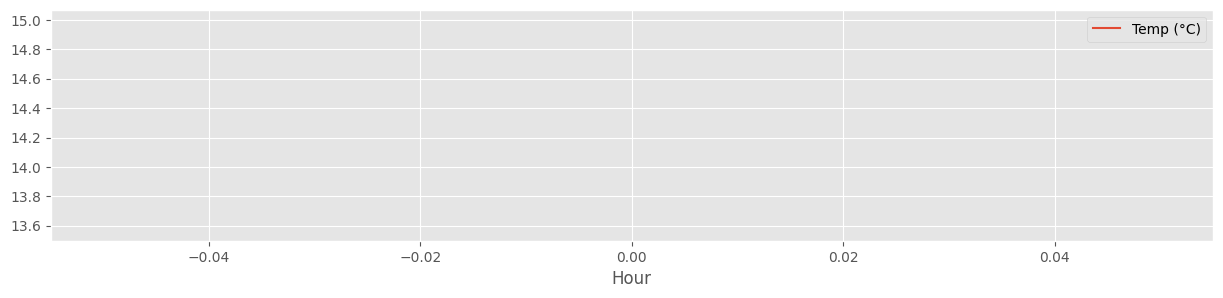

In [33]:
temperatures = weather_mar2012[[u'Temp (°C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

## Getting the whole year of data


Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month.

I noticed that there's an irritating bug where when I ask for January, it gives me data for the previous year, so we'll fix that too. [no, really. You can check =)]

In [34]:
def download_weather_month(year=2012, month=1):
    url = url_template.format(year=year, month=month)
    asset = ds.assets[url]
    weather_data = asset.mock
    weather_data = weather_data.dropna(axis=1)
    return weather_data

We can test that this function does the right thing:



In [35]:
download_weather_month(2012, 1)[:5]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,36.292217,73,5,10.736482,54.929452,Thunderstorms
2010-06-02,7.291421,90,9,6.358588,87.364645,Clear
2010-06-03,31.666034,85,11,5.706302,59.901185,"Thunderstorms,Rain Showers"
2010-06-04,31.875453,67,17,19.903167,67.169897,"Snow,Haze"
2010-06-05,21.079877,90,11,28.496021,83.340678,Thunderstorms


Now we can get all the months at once. This will take a little while to run.



In [36]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using pd.concat. And now we have the whole year's data!

In [37]:
data_by_month[0]

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,36.292217,73,5,10.736482,54.929452,Thunderstorms
2010-06-02,7.291421,90,9,6.358588,87.364645,Clear
2010-06-03,31.666034,85,11,5.706302,59.901185,"Thunderstorms,Rain Showers"
2010-06-04,31.875453,67,17,19.903167,67.169897,"Snow,Haze"
2010-06-05,21.079877,90,11,28.496021,83.340678,Thunderstorms
...,...,...,...,...,...,...
2012-06-09,1.045625,66,19,29.214064,68.414322,"Thunderstorms,Heavy Rain Showers"
2012-06-10,-0.412258,69,25,2.562607,97.061128,"Rain,Snow"
2012-06-11,37.455196,94,13,20.436181,72.638467,"Thunderstorms,Moderate Rain Showers,Fog"
2012-06-12,31.193904,92,5,19.386227,51.499537,Freezing Drizzle


In [38]:
weather_2012 = pd.concat(data_by_month)

In [39]:
weather_2012

,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2010-06-01,36.292217,73,5,10.736482,54.929452,Thunderstorms
2010-06-02,7.291421,90,9,6.358588,87.364645,Clear
2010-06-03,31.666034,85,11,5.706302,59.901185,"Thunderstorms,Rain Showers"
2010-06-04,31.875453,67,17,19.903167,67.169897,"Snow,Haze"
2010-06-05,21.079877,90,11,28.496021,83.340678,Thunderstorms
...,...,...,...,...,...,...
2012-06-09,6.428862,71,26,24.059715,51.296919,"Freezing Rain,Snow Grains"
2012-06-10,10.097532,91,7,36.584033,53.854448,"Rain Showers,Snow Showers"
2012-06-11,16.321387,77,17,24.732692,90.481961,Freezing Rain
2012-06-12,16.408463,84,18,3.233315,84.759845,"Thunderstorms,Rain Showers"


## Putting it together

Now we want to request the full code execution.

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing sum to max, numpy.median, or any other function you like.

In [40]:
@sy.syft_function(input_policy=sy.ExactMatch(month1df=ds.assets["weather1"], month2df=ds.assets["weather2"]),
                  output_policy=sy.SingleExecutionExactOutput())
def get_2012_weather(month1df, month2df):
    import pandas as pd
    month_dfs = [month1df, month2df]
    month_dfs = [x.dropna(axis=1) for x in month_dfs]
    weather_2012 = pd.concat(month_dfs)
    return weather_2012

Request code execution

In [41]:
req = guest_domain_client.api.services.code.request_code_execution(get_2012_weather)

In [42]:
submitted_code = guest_domain_client.code[0]

In [43]:
assert guest_domain_client.api.services.code.get_all()

Create and submit project

In [44]:
new_project = sy.Project(name="Pandas Chapter 5",
                         description="Hi, get all weather data for 2012")

In [45]:
new_project.add_request(obj=submitted_code, permission=sy.UserCodeStatus.EXECUTE)

In [46]:
guest_domain_client.submit_project(new_project)

<class 'syft.core.node.new.response.SyftSuccess'>: Project Submitted

# Data owner: execute syft function

In [47]:
from syft import Worker, MessageStatus
from syft.core.node.new.project import Project

In [51]:
domain_client = worker.guest_client.login(email="info@openmined.org", password="changethis")

## Get messages

In [52]:
messages = domain_client.api.services.messages.get_all_for_status(MessageStatus.UNDELIVERED)

In [53]:
messages

,type,id,subject,status,created_at,linked_obj
0,syft.core.node.new.messages.Message,b748789e64d74df2a72e8b5d5bc093ad,Project Approval,MessageStatus.UNDELIVERED,2023-05-15 12:27:28,<<class 'syft.core.node.new.project.Project'>:...
1,syft.core.node.new.messages.Message,1cafa7f772ee483ab361b9da91fb2a07,Approval Request,MessageStatus.UNDELIVERED,2023-05-15 12:27:25,<<class 'syft.core.node.new.request.Request'>:...


In [54]:
project_message = [x for x in messages if issubclass(x.linked_obj.object_type, Project)][0]

In [55]:
request = project_message.link.requests[0]
func = request.changes[0].link
op = func.output_policy_type

In [56]:
func

```python
class UserCode:
  id: str = bc70494db7b84810ba45add26168b61c
  node_uid: str = 7bca415d13ed1ec841f0d0aede098dbb
  user_verify_key: str = 21eac33a776023ece71574bc0ad2820eb03ffb0cbdd414f11bee2508dcd1899a
  raw_code: str = "@sy.syft_function(input_policy=sy.ExactMatch(month1df=ds.assets["weather1"], month2df=ds.assets["weather2"]),
                  output_policy=sy.SingleExecutionExactOutput())
def get_2012_weather(month1df, month2df):
    import pandas as pd
    month_dfs = [month1df, month2df]
    month_dfs = [x.dropna(axis=1) for x in month_dfs]
    weather_2012 = pd.concat(month_dfs)
    return weather_2012
"
  input_policy_type: str = <class 'syft.core.node.new.policy.ExactMatch'>
  input_policy_init_kwargs: str = {NodeView(node_name='test-domain-1', verify_key=aec6ea4dfc049ceacaeeebc493167a88a200ddc367b1fa32da652444b635d21f): {'month1df': <UID: 2ba0372fd8884135aa55b8dbc361c2ae>, 'month2df': <UID: 44c2931155c04fd696bcc3b954ec93e1>}}
  input_policy_state: str = b''
  output_policy_type: str = <class 'syft.core.node.new.policy.OutputPolicyExecuteOnce'>
  output_policy_init_kwargs: str = {}
  output_policy_state: str = b''
  parsed_code: str = "

def user_func_get_2012_weather_21eac33a776023ece71574bc0ad2820eb03ffb0cbdd414f11bee2508dcd1899a_aa72ee790fbfc5659f07c56a4745f6912732e6ba459c2bba422aca1516024162(month1df, month2df):

    def get_2012_weather(month1df, month2df):
        import pandas as pd
        month_dfs = [month1df, month2df]
        month_dfs = [x.dropna(axis=1) for x in month_dfs]
        weather_2012 = pd.concat(month_dfs)
        return weather_2012
    result = get_2012_weather(month1df=month1df, month2df=month2df)
    return result
"
  service_func_name: str = "get_2012_weather"
  unique_func_name: str = "user_func_get_2012_weather_21eac33a776023ece71574bc0ad2820eb03ffb0cbdd414f11bee2508dcd1899a_aa72ee790fbfc5659f07c56a4745f6912732e6ba459c2bba422aca1516024162"
  user_unique_func_name: str = "user_func_get_2012_weather_21eac33a776023ece71574bc0ad2820eb03ffb0cbdd414f11bee2508dcd1899a"
  code_hash: str = "aa72ee790fbfc5659f07c56a4745f6912732e6ba459c2bba422aca1516024162"
  signature: str = (month1df, month2df)
  status: str = {NodeView(node_name='test-domain-1', verify_key=aec6ea4dfc049ceacaeeebc493167a88a200ddc367b1fa32da652444b635d21f): <UserCodeStatus.SUBMITTED: 'submitted'>}
  input_kwargs: str = ['month1df', 'month2df']
  enclave_metadata: str = None

```

In [57]:
get_col_user_function = func.unsafe_function

In [58]:
real_data1, real_data2 = domain_client.datasets[0].assets["weather1"].data, domain_client.datasets[0].assets["weather2"].data

In [59]:
real_data1

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,00:00,-1.8,NaN,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,01:00,-1.8,NaN,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,02:00,-1.8,NaN,...,NaN,4.0,NaN,101.26,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,03:00,-1.5,NaN,...,NaN,4.0,NaN,101.27,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,04:00,-1.5,NaN,...,NaN,4.8,NaN,101.23,NaN,NaN,NaN,-4.0,NaN,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,19:00,-7.7,NaN,...,NaN,1.6,NaN,101.14,NaN,NaN,NaN,-15.0,NaN,Snow
2012-01-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,20:00,-7.4,NaN,...,NaN,1.6,NaN,101.09,NaN,NaN,NaN,-15.0,NaN,Snow
2012-01-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,31,21:00,-7.1,NaN,...,NaN,12.9,NaN,101.02,NaN,NaN,NaN,-14.0,NaN,Cloudy


In [60]:
real_result = get_col_user_function(month1df=real_data1, month2df=real_data2)

In [61]:
len(real_data1) + len(real_data2) == len(real_result)

True

In [62]:
result = request.accept_by_depositing_result(real_result)
result
assert isinstance(result, sy.SyftSuccess)

# Data scientist: fetch result

In [63]:
guest_domain_client = worker.guest_client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [64]:
asset1, asset2 = guest_client.datasets[0].assets["weather1"], guest_client.datasets[0].assets["weather2"]

In [65]:
guest_client.api.services.code[0].status

{NodeView(node_name='test-domain-1', verify_key=aec6ea4dfc049ceacaeeebc493167a88a200ddc367b1fa32da652444b635d21f): <UserCodeStatus.EXECUTE: 'execute'>}

In [66]:
real_result = guest_client.api.services.code.get_2012_weather(month1df=asset1, month2df=asset2)

In [67]:
weather_2012 = real_result

In [68]:
len(weather_2012)

1440

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [69]:
weather_2012.to_csv('/tmp/weather_2012.csv');

And we're done!